<a href="https://colab.research.google.com/github/Sachini007/Data-Storm-3.0/blob/main/03-27/H2O_AutoML_DataStorm_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# this command is to use GPU? This shows information about our GPU
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
!apt-get install default-jre
!java -version

# because h2o is built on Java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
openjdk version "11.0.14" 2022-01-18
OpenJDK Runtime Environment (build 11.0.14+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.14+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [3]:
!pip install h2o &> /dev/null

In [4]:
import h2o

h2o.init()  # Initializing H2O

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14" 2022-01-18; OpenJDK Runtime Environment (build 11.0.14+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.14+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3orwypx3
  JVM stdout: /tmp/tmp3orwypx3/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3orwypx3/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_unknownUser_1g09tg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
from h2o.automl import H2OAutoML

In [6]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [32]:
train = '/gdrive/MyDrive/Data Storm 2021/train (3).csv'
val = '/gdrive/MyDrive/Data Storm 2021/val.csv'

In [33]:
train_df = h2o.import_file(train)
val = h2o.import_file(val)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [34]:
train_df.types

{'CategoryCode_category_2': 'int',
 'CategoryCode_category_3': 'int',
 'CategoryCode_category_4': 'int',
 'Day_10': 'int',
 'Day_11': 'int',
 'Day_13': 'int',
 'Day_14': 'int',
 'Day_15': 'int',
 'Day_17': 'int',
 'Day_18': 'int',
 'Day_20': 'int',
 'Day_21': 'int',
 'Day_22': 'int',
 'Day_24': 'int',
 'Day_25': 'int',
 'Day_27': 'int',
 'Day_28': 'int',
 'Day_29': 'int',
 'Day_3': 'int',
 'Day_31': 'int',
 'Day_4': 'int',
 'Day_6': 'int',
 'Day_7': 'int',
 'Day_8': 'int',
 'ItemCode_1003147': 'int',
 'ItemCode_1003156': 'int',
 'ItemCode_1003183': 'int',
 'ItemCode_1003192': 'int',
 'ItemCode_1006009': 'int',
 'ItemCode_1006090': 'int',
 'ItemCode_1006099': 'int',
 'ItemCode_1006108': 'int',
 'ItemCode_1010068': 'int',
 'ItemCode_1013335': 'int',
 'ItemCode_1015621': 'int',
 'ItemCode_1021264': 'int',
 'ItemCode_1024810': 'int',
 'ItemCode_1026871': 'int',
 'ItemCode_1030948': 'int',
 'ItemCode_1032532': 'int',
 'ItemCode_1032541': 'int',
 'ItemCode_1032550': 'int',
 'ItemCode_1032559

In [36]:
val.types

{'CategoryCode_category_2': 'int',
 'CategoryCode_category_3': 'int',
 'CategoryCode_category_4': 'int',
 'Day_10': 'int',
 'Day_11': 'int',
 'Day_13': 'int',
 'Day_14': 'int',
 'Day_15': 'int',
 'Day_17': 'int',
 'Day_18': 'int',
 'Day_20': 'int',
 'Day_21': 'int',
 'Day_22': 'int',
 'Day_24': 'int',
 'Day_25': 'int',
 'Day_27': 'int',
 'Day_28': 'int',
 'Day_29': 'int',
 'Day_3': 'int',
 'Day_31': 'int',
 'Day_4': 'int',
 'Day_6': 'int',
 'Day_7': 'int',
 'Day_8': 'int',
 'ItemCode_1003147': 'int',
 'ItemCode_1003156': 'int',
 'ItemCode_1003183': 'int',
 'ItemCode_1003192': 'int',
 'ItemCode_1006009': 'int',
 'ItemCode_1006090': 'int',
 'ItemCode_1006099': 'int',
 'ItemCode_1006108': 'int',
 'ItemCode_1010068': 'int',
 'ItemCode_1013335': 'int',
 'ItemCode_1015621': 'int',
 'ItemCode_1021264': 'int',
 'ItemCode_1024810': 'int',
 'ItemCode_1026871': 'int',
 'ItemCode_1030948': 'int',
 'ItemCode_1032532': 'int',
 'ItemCode_1032541': 'int',
 'ItemCode_1032550': 'int',
 'ItemCode_1032559

In [37]:
train_df.describe()

Rows:3772
Cols:229




,WeeklySales,ind,CategoryCode_category_2,CategoryCode_category_3,CategoryCode_category_4,ItemCode_3427,ItemCode_7666,ItemCode_9925,ItemCode_16936,ItemCode_17287,ItemCode_17296,ItemCode_20824,ItemCode_23200,ItemCode_23569,ItemCode_24136,ItemCode_30877,ItemCode_32245,ItemCode_35449,ItemCode_35530,ItemCode_35584,ItemCode_36898,ItemCode_37510,ItemCode_37861,ItemCode_38518,ItemCode_39436,ItemCode_40759,ItemCode_41830,ItemCode_42424,ItemCode_42496,ItemCode_43630,ItemCode_43657,ItemCode_43738,ItemCode_48940,ItemCode_50785,ItemCode_57058,ItemCode_59047,ItemCode_59749,ItemCode_64978,ItemCode_65788,ItemCode_75886,ItemCode_76399,ItemCode_86974,ItemCode_86992,ItemCode_87046,ItemCode_87559,ItemCode_88450,ItemCode_99079,ItemCode_110320,ItemCode_111382,ItemCode_111436,ItemCode_117610,ItemCode_118033,ItemCode_119554,ItemCode_123307,ItemCode_124774,ItemCode_124954,ItemCode_130993,ItemCode_131983,ItemCode_132028,ItemCode_132334,ItemCode_138742,ItemCode_142756,ItemCode_145330,ItemCode_145978,ItemCode_169504,ItemCode_172033,ItemCode_172582,ItemCode_173617,ItemCode_174436,ItemCode_210868,ItemCode_211309,ItemCode_213802,ItemCode_216151,ItemCode_225259,ItemCode_245581,ItemCode_248272,ItemCode_262384,ItemCode_267478,ItemCode_267496,ItemCode_370195,ItemCode_371104,ItemCode_371239,ItemCode_379249,ItemCode_397213,ItemCode_399220,ItemCode_416212,ItemCode_687616,ItemCode_731104,ItemCode_745945,ItemCode_753613,ItemCode_755584,ItemCode_815101,ItemCode_836125,ItemCode_836152,ItemCode_836584,ItemCode_837943,ItemCode_838456,ItemCode_839356,ItemCode_839374,ItemCode_858886,ItemCode_865933,ItemCode_872260,ItemCode_877624,ItemCode_893824,ItemCode_903976,ItemCode_906586,ItemCode_906595,ItemCode_913561,ItemCode_999403,ItemCode_1003147,ItemCode_1003156,ItemCode_1003183,ItemCode_1003192,ItemCode_1006009,ItemCode_1006090,ItemCode_1006099,ItemCode_1006108,ItemCode_1010068,ItemCode_1013335,ItemCode_1015621,ItemCode_1021264,ItemCode_1024810,ItemCode_1026871,ItemCode_1030948,ItemCode_1032532,ItemCode_1032541,ItemCode_1032550,ItemCode_1032559,ItemCode_1032568,ItemCode_1032586,ItemCode_1044502,ItemCode_1044610,ItemCode_1044619,ItemCode_1044682,ItemCode_1044691,ItemCode_1047130,ItemCode_1047967,ItemCode_1048975,ItemCode_1049776,ItemCode_1050046,ItemCode_1054978,ItemCode_1056463,ItemCode_1058713,ItemCode_1060630,ItemCode_1060909,ItemCode_1061341,ItemCode_1061638,ItemCode_1063600,ItemCode_1064473,ItemCode_1064572,ItemCode_1066570,ItemCode_1067074,ItemCode_1067092,ItemCode_1067119,ItemCode_1067128,ItemCode_1068883,ItemCode_1070818,ItemCode_1070836,ItemCode_1071106,ItemCode_1071115,ItemCode_1071124,ItemCode_1074823,ItemCode_1075651,ItemCode_1076920,ItemCode_1076929,ItemCode_1076938,ItemCode_1077118,ItemCode_1081060,ItemCode_1081069,ItemCode_1081078,ItemCode_1081087,ItemCode_1081321,ItemCode_1081339,ItemCode_1082743,ItemCode_1084498,ItemCode_1085749,ItemCode_1090024,ItemCode_1090105,ItemCode_1090114,ItemCode_1090240,ItemCode_1090249,ItemCode_1090258,ItemCode_1090276,ItemCode_1090294,ItemCode_1090303,ItemCode_1092184,ItemCode_1097143,ItemCode_1098493,ItemCode_1098502,ItemCode_1101553,ItemCode_1101562,ItemCode_1101571,ItemCode_1101661,ItemCode_1101769,ItemCode_1103056,ItemCode_1105009,ItemCode_1105018,ItemCode_1105027,Month_2,Month_3,Month_10,Month_11,Month_12,Year_2022,Day_3,Day_4,Day_6,Day_7,Day_8,Day_10,Day_11,Day_13,Day_14,Day_15,Day_17,Day_18,Day_20,Day_21,Day_22,Day_24,Day_25,Day_27,Day_28,Day_29,Day_31,Week Num_2,Week Num_3,Week Num_4,Week Num_5
type,int,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,in

In [38]:
y = 'WeeklySales'
x = train_df.columns
x.remove(y)

In [39]:
x

['ind',
 'CategoryCode_category_2',
 'CategoryCode_category_3',
 'CategoryCode_category_4',
 'ItemCode_3427',
 'ItemCode_7666',
 'ItemCode_9925',
 'ItemCode_16936',
 'ItemCode_17287',
 'ItemCode_17296',
 'ItemCode_20824',
 'ItemCode_23200',
 'ItemCode_23569',
 'ItemCode_24136',
 'ItemCode_30877',
 'ItemCode_32245',
 'ItemCode_35449',
 'ItemCode_35530',
 'ItemCode_35584',
 'ItemCode_36898',
 'ItemCode_37510',
 'ItemCode_37861',
 'ItemCode_38518',
 'ItemCode_39436',
 'ItemCode_40759',
 'ItemCode_41830',
 'ItemCode_42424',
 'ItemCode_42496',
 'ItemCode_43630',
 'ItemCode_43657',
 'ItemCode_43738',
 'ItemCode_48940',
 'ItemCode_50785',
 'ItemCode_57058',
 'ItemCode_59047',
 'ItemCode_59749',
 'ItemCode_64978',
 'ItemCode_65788',
 'ItemCode_75886',
 'ItemCode_76399',
 'ItemCode_86974',
 'ItemCode_86992',
 'ItemCode_87046',
 'ItemCode_87559',
 'ItemCode_88450',
 'ItemCode_99079',
 'ItemCode_110320',
 'ItemCode_111382',
 'ItemCode_111436',
 'ItemCode_117610',
 'ItemCode_118033',
 'ItemCode_11

In [40]:
autoML = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ['StackedEnsemble', 'DeepLearning'], verbosity = 'info', nfolds = 0)
# StackedEnsemble gives good results but is a complex model
# nfolds = 0 because we provide a validation data set

In [41]:
autoML.train(x = x, y = y, training_frame = train_df, validation_frame = val)

AutoML progress: |
05:32:01.914: Project: AutoML_2_20220328_53201
05:32:01.914: Cross-validation disabled by user: no fold column nor nfolds > 1.
05:32:01.915: Setting stopping tolerance adaptively based on the training frame: 0.0162822402256459
05:32:01.915: Build control seed: 10
05:32:01.916: training frame: Frame key: AutoML_2_20220328_53201_training_train__3_1.hex    cols: 229    rows: 3772  chunks: 8    size: 163169  checksum: -14439925324605
05:32:01.916: validation frame: Frame key: val1.hex    cols: 229    rows: 370  chunks: 8    size: 149856  checksum: -1153892643288
05:32:01.926: leaderboard frame: Frame key: val1.hex    cols: 229    rows: 370  chunks: 8    size: 149856  checksum: -1153892643288
05:32:01.926: blending frame: NULL
05:32:01.926: response column: WeeklySales
05:32:01.926: fold column: null
05:32:01.926: weights column: null
05:32:01.936: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (6g, 30w

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,35.0,35.0,170442.0,20.0,20.0,20.0,196.0,635.0,375.3143




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 888.3822700491415
RMSE: 29.805742232817177
MAE: 16.289775997532786
RMSLE: 0.7522136106669224
Mean Residual Deviance: 888.3822700491415

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 1384.046401784371
RMSE: 37.20277411409492
MAE: 20.336482429467573
RMSLE: 0.749450361533432
Mean Residual Deviance: 1384.046401784371

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2022-03-28 05:32:15,0.003 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-03-28 05:32:16,0.687 sec,5.0,32.672921,17.604658,1067.519773,37.917932,20.915533,1437.769537
2,,2022-03-28 05:32:17,1.324 sec,10.0,31.603863,17.001297,998.804186,36.946413,20.345483,1365.037445
3,,2022-03-28 05:32:17,1.853 sec,15.0,30.888372,16.763565,954.091511,37.261685,20.320318,1388.433179
4,,2022-03-28 05:32:18,2.408 sec,20.0,30.532166,16.449624,932.213147,37.036750,20.201801,1371.720819
5,,2022-03-28 05:32:18,2.944 sec,25.0,30.372174,16.424441,922.468950,37.091786,20.341803,1375.800598
6,,2022-03-28 05:32:19,3.328 sec,30.0,30.054730,16.326970,903.286794,37.373804,20.329004,1396.801227
7,,2022-03-28 05:32:19,3.749 sec,35.0,29.805742,16.289776,888.382270,37.202774,20.336482,1384.046402



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,ItemCode_169504,1.791842e+08,1.000000,0.362818
1,ItemCode_17296,1.014568e+08,0.566215,0.205433
2,ItemCode_123307,8.316591e+07,0.464136,0.168397
3,CategoryCode_category_4,7.418998e+06,0.041404,0.015022
4,ItemCode_1074823,7.246041e+06,0.040439,0.014672
5,ItemCode_132028,7.072762e+06,0.039472,0.014321
6,ItemCode_119554,6.165549e+06,0.034409,0.012484
7,Month_10,5.238053e+06,0.029233,0.010606
8,ItemCode_37861,4.641554e+06,0.025904,0.009398
9,ItemCode_20824,4.634693e+06,0.025866,0.009384



See the whole table with table.as_data_frame()


In [42]:
lb = autoML.leaderboard

In [43]:
lb.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
DRF_1_AutoML_2_20220328_53201,1384.05,37.2028,1384.05,20.3365,0.74945
XGBoost_2_AutoML_2_20220328_53201,1397.68,37.3856,1397.68,20.0989,0.696529
GLM_1_AutoML_2_20220328_53201,1445.96,38.0258,1445.96,19.2982,0.654007
XGBoost_3_AutoML_2_20220328_53201,1468.02,38.3147,1468.02,20.2614,0.72136
XGBoost_1_AutoML_2_20220328_53201,1527.7,39.0858,1527.7,20.3682,nan
GBM_4_AutoML_2_20220328_53201,1564.79,39.5575,1564.79,21.1099,0.736768
GBM_3_AutoML_2_20220328_53201,1579.49,39.7428,1579.49,21.4947,0.755704
GBM_2_AutoML_2_20220328_53201,1599.97,39.9996,1599.97,21.6029,0.764395
GBM_1_AutoML_2_20220328_53201,5231.36,72.3281,5231.36,32.4798,1.03007
XRT_1_AutoML_2_20220328_53201,16410.1,128.102,16410.1,119.293,2.05419


In [45]:
Y_val = val['WeeklySales']
X_val = val.drop('WeeklySales', axis=1)

In [48]:
pred = autoML.leader.predict(X_val)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [49]:
pred.head()

predict
17.2679
17.2679
17.2679
22.0671
22.0671
22.0671
17.2679
66.2857
17.2679
22.4173


In [22]:
autoML.leader.model_performance(test_df)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 1665.2066889460723
RMSE: 40.806944126534056
MAE: 23.049639703024003
RMSLE: 0.7859534061935842
Mean Residual Deviance: 1665.2066889460723


In [50]:
import numpy as np


y_true = Y_val
y_pred = pred.trunc()

In [51]:
h2o.export_file(y_true, path = "/tmp/true.csv", force = True)
h2o.export_file(y_pred, path = "/tmp/pred.csv", force = True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [52]:
model_ids = list(autoML.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [53]:
model_ids

['DRF_1_AutoML_2_20220328_53201',
 'XGBoost_2_AutoML_2_20220328_53201',
 'GLM_1_AutoML_2_20220328_53201',
 'XGBoost_3_AutoML_2_20220328_53201',
 'XGBoost_1_AutoML_2_20220328_53201',
 'GBM_4_AutoML_2_20220328_53201',
 'GBM_3_AutoML_2_20220328_53201',
 'GBM_2_AutoML_2_20220328_53201',
 'GBM_1_AutoML_2_20220328_53201',
 'XRT_1_AutoML_2_20220328_53201']

In [54]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
# we will take one XGBoost model and analyze it further

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_2_20220328_53201


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 694.9475501428869
RMSE: 26.36185786591846
MAE: 13.947492589532128
RMSLE: NaN
Mean Residual Deviance: 694.9475501428869

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 1397.6811077656935
RMSE: 37.38557352463238
MAE: 20.098899315498972
RMSLE: 0.6965288705252033
Mean Residual Deviance: 1397.6811077656935

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2022-03-28 05:32:10,0.005 sec,0.0,83.680395,38.327413,7002.408537,84.119743,42.259459,7076.131081
1,,2022-03-28 05:32:11,0.428 sec,5.0,39.403673,19.585609,1552.649415,54.110903,24.905669,2927.989786
2,,2022-03-28 05:32:11,0.489 sec,10.0,30.710310,17.833207,943.123159,41.368245,22.807561,1711.331711
3,,2022-03-28 05:32:11,0.556 sec,15.0,29.041784,16.669022,843.425237,40.117321,22.248374,1609.399416
4,,2022-03-28 05:32:12,1.375 sec,20.0,28.303565,15.907627,801.091781,38.584026,21.506393,1488.727079
5,,2022-03-28 05:32:12,1.982 sec,25.0,27.735027,15.329491,769.231700,38.397836,21.200565,1474.393818
6,,2022-03-28 05:32:13,2.791 sec,30.0,27.315025,14.942720,746.110595,37.661780,20.512364,1418.409643
7,,2022-03-28 05:32:14,3.408 sec,35.0,26.922049,14.489936,724.796732,37.044261,20.299616,1372.277252
8,,2022-03-28 05:32:14,3.624 sec,40.0,26.636628,14.288464,709.509942,37.616089,20.265932,1414.970115
9,,2022-03-28 05:32:14,3.751 sec,45.0,26.479345,14.032498,701.155697,38.316952,20.367513,1468.188784



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,ItemCode_169504,7.671230e+06,1.000000,0.319283
1,ItemCode_17296,5.398242e+06,0.703700,0.224679
2,ItemCode_123307,4.565570e+06,0.595155,0.190023
3,ItemCode_1074823,8.316071e+05,0.108406,0.034612
4,ItemCode_119554,4.226012e+05,0.055089,0.017589
5,Year_2022,4.187188e+05,0.054583,0.017427
6,ItemCode_132028,4.071172e+05,0.053071,0.016945
7,CategoryCode_category_4,3.569722e+05,0.046534,0.014857
8,ItemCode_37861,3.446275e+05,0.044925,0.014344
9,ItemCode_836584,2.922913e+05,0.038102,0.012165



See the whole table with table.as_data_frame()


In [55]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'cpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'gaussian', 'default': 'AUTO', '

In [56]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 10,
  'min_child_weight': 5.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'reg:squarederror',
  'seed': 13,
  'silent': True,
  'subsample': 0.6,
  'tree_method': 'exact'},
 10000)

In [57]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_2_20220328_53201


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 694.9475501428869
RMSE: 26.36185786591846
MAE: 13.947492589532128
RMSLE: NaN
Mean Residual Deviance: 694.9475501428869

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 1397.6811077656935
RMSE: 37.38557352463238
MAE: 20.098899315498972
RMSLE: 0.6965288705252033
Mean Residual Deviance: 1397.6811077656935

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2022-03-28 05:32:10,0.005 sec,0.0,83.680395,38.327413,7002.408537,84.119743,42.259459,7076.131081
1,,2022-03-28 05:32:11,0.428 sec,5.0,39.403673,19.585609,1552.649415,54.110903,24.905669,2927.989786
2,,2022-03-28 05:32:11,0.489 sec,10.0,30.710310,17.833207,943.123159,41.368245,22.807561,1711.331711
3,,2022-03-28 05:32:11,0.556 sec,15.0,29.041784,16.669022,843.425237,40.117321,22.248374,1609.399416
4,,2022-03-28 05:32:12,1.375 sec,20.0,28.303565,15.907627,801.091781,38.584026,21.506393,1488.727079
5,,2022-03-28 05:32:12,1.982 sec,25.0,27.735027,15.329491,769.231700,38.397836,21.200565,1474.393818
6,,2022-03-28 05:32:13,2.791 sec,30.0,27.315025,14.942720,746.110595,37.661780,20.512364,1418.409643
7,,2022-03-28 05:32:14,3.408 sec,35.0,26.922049,14.489936,724.796732,37.044261,20.299616,1372.277252
8,,2022-03-28 05:32:14,3.624 sec,40.0,26.636628,14.288464,709.509942,37.616089,20.265932,1414.970115
9,,2022-03-28 05:32:14,3.751 sec,45.0,26.479345,14.032498,701.155697,38.316952,20.367513,1468.188784



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,ItemCode_169504,7.671230e+06,1.000000,0.319283
1,ItemCode_17296,5.398242e+06,0.703700,0.224679
2,ItemCode_123307,4.565570e+06,0.595155,0.190023
3,ItemCode_1074823,8.316071e+05,0.108406,0.034612
4,ItemCode_119554,4.226012e+05,0.055089,0.017589
5,Year_2022,4.187188e+05,0.054583,0.017427
6,ItemCode_132028,4.071172e+05,0.053071,0.016945
7,CategoryCode_category_4,3.569722e+05,0.046534,0.014857
8,ItemCode_37861,3.446275e+05,0.044925,0.014344
9,ItemCode_836584,2.922913e+05,0.038102,0.012165



See the whole table with table.as_data_frame()


In [58]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

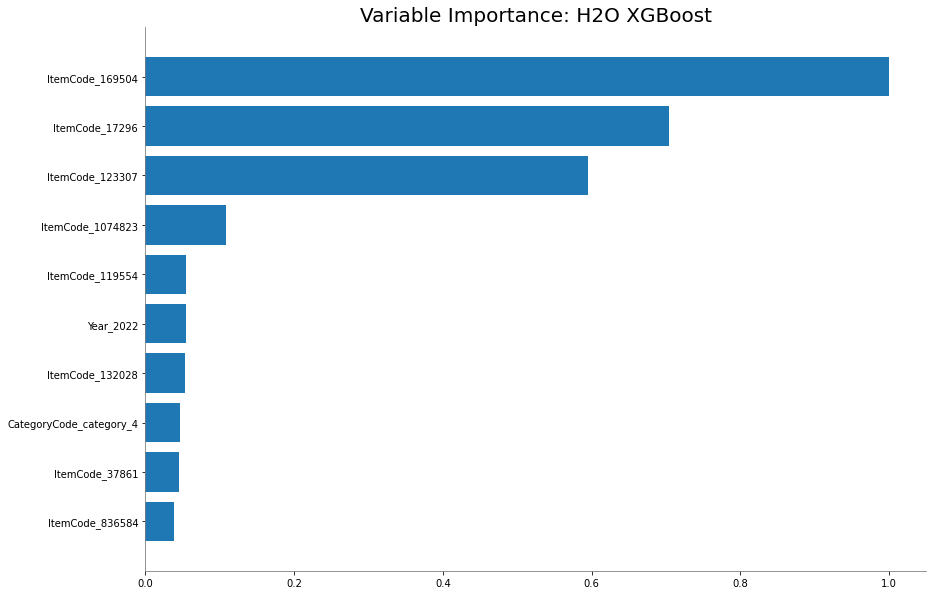

<Figure size 432x288 with 0 Axes>

In [60]:
out.varimp_plot()

In [ ]:
# autoML.leader.download_mojo(path="./")